## Importar librerías

In [11]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns

## Carga de los datos

In [12]:
# Ruta de ubicación de los datos
ruta = os.path.abspath('../data/modelos_entrenamiento/')

# Cargar los datos
X_train = pd.read_csv(os.path.join(ruta, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(ruta, 'y_train.csv')).values.ravel()
X_val = pd.read_csv(os.path.join(ruta, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(ruta, 'y_val.csv')).values.ravel()
X_test = pd.read_csv(os.path.join(ruta, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(ruta, 'y_test.csv')).values.ravel()

## Inicializar el modelo de Ramdon Forest Classifier

In [13]:
# Inicializar el modelo RandomForestClassifier
# - n_estimators: número de árboles en el bosque
# - max_depth: profundidad máxima de los árboles
# - random_state: semilla para asegurar la reproducibilidad
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

## Entrenar el modelo con los datos de entrenamiento

In [14]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Evaluar el modelo en el conjunto de validación

In [15]:
# Evaluar el modelo en el conjunto de validación
val_preds = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_recall = recall_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds)
val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

print(f"Exactitud en Validación: {val_accuracy:.2f}")
print(f"Recall en Validación: {val_recall:.2f}")
print(f"F1 Score en Validación: {val_f1:.2f}")
print(f"AUC en Validación: {val_auc:.2f}")

Exactitud en Validación: 0.94
Recall en Validación: 0.92
F1 Score en Validación: 0.93
AUC en Validación: 0.99


## Evaluar el modelo en el conjunto de prueba (test)

In [16]:
# Evaluar el modelo en el conjunto de prueba (test)
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Exactitud en Prueba: {test_accuracy:.2f}")
print(f"Recall en Prueba: {test_recall:.2f}")
print(f"F1 Score en Prueba: {test_f1:.2f}")
print(f"AUC en Prueba: {test_auc:.2f}")

Exactitud en Prueba: 0.94
Recall en Prueba: 0.92
F1 Score en Prueba: 0.94
AUC en Prueba: 0.99


In [17]:
# Predicciones en cada conjunto de datos
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Obtener probabilidades para el AUC
y_train_proba = model.predict_proba(X_train)[:, 1]
y_val_proba = model.predict_proba(X_val)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Métricas para el conjunto de entrenamiento
print("\n### Métricas de Entrenamiento ###")
print("ROC AUC Score en el set de entrenamiento:", roc_auc_score(y_train, y_train_proba))
print("Reporte de clasificación para entrenamiento:\n", classification_report(y_train, y_train_pred))

# Métricas para el conjunto de validación
print("\n### Métricas de Validación ###")
print("ROC AUC Score en el set de validación:", roc_auc_score(y_val, y_val_proba))
print("Reporte de clasificación para validación:\n", classification_report(y_val, y_val_pred))

# Métricas para el conjunto de prueba
print("\n### Métricas de Prueba ###")
print("ROC AUC Score en el set de prueba:", roc_auc_score(y_test, y_test_proba))
print("Reporte de clasificación para prueba:\n", classification_report(y_test, y_test_pred))


### Métricas de Entrenamiento ###
ROC AUC Score en el set de entrenamiento: 0.9918537886536908
Reporte de clasificación para entrenamiento:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     35261
           1       0.95      0.93      0.94     26895

    accuracy                           0.95     62156
   macro avg       0.95      0.95      0.95     62156
weighted avg       0.95      0.95      0.95     62156


### Métricas de Validación ###
ROC AUC Score en el set de validación: 0.9887494159702708
Reporte de clasificación para validación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11781
           1       0.94      0.92      0.93      8938

    accuracy                           0.94     20719
   macro avg       0.94      0.94      0.94     20719
weighted avg       0.94      0.94      0.94     20719


### Métricas de Prueba ###
ROC AUC Score en el set de prueba: 0.989220

## Matriz de confusión

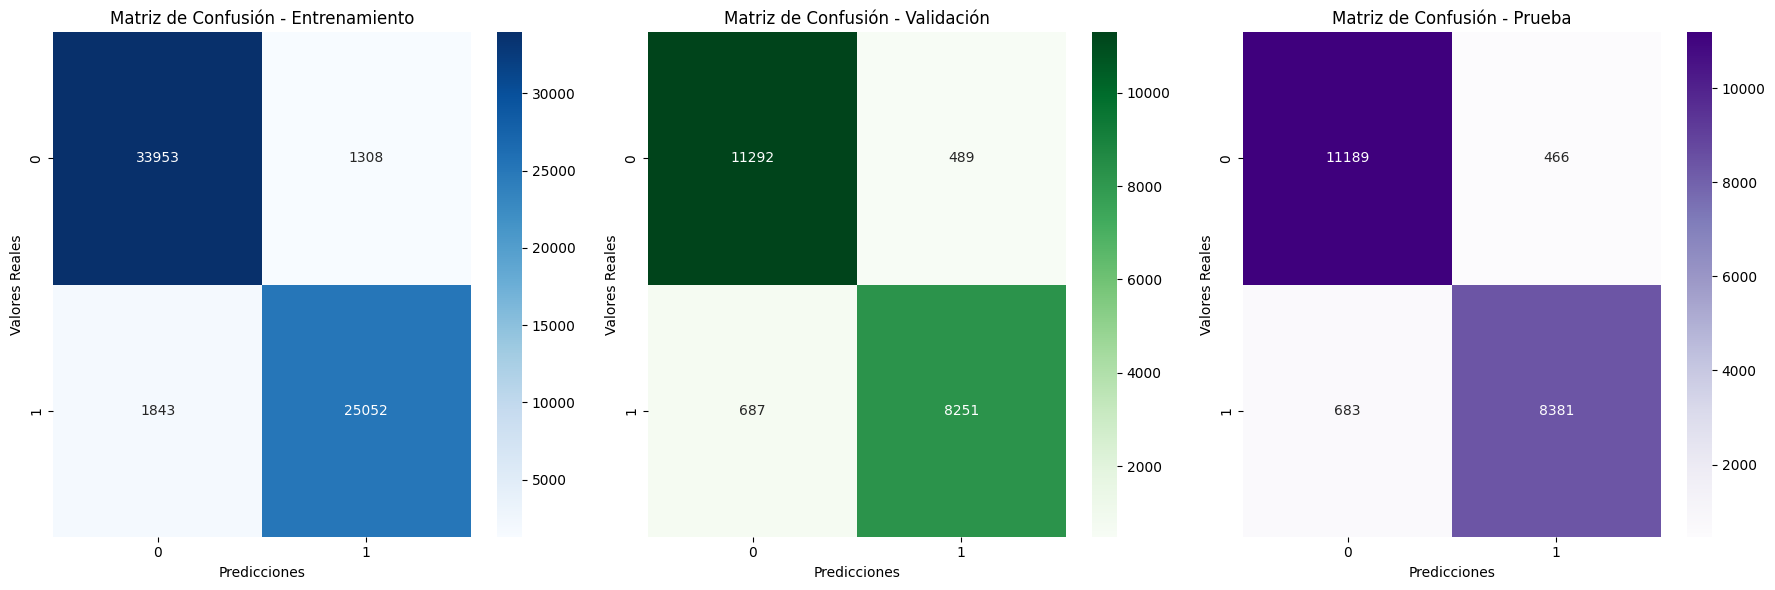

In [18]:
# Calcular las matrices de confusión
cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Crear una figura con subplots para las tres matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Gráfico para la matriz de confusión de entrenamiento
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Matriz de Confusión - Entrenamiento')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')

# Gráfico para la matriz de confusión de validación
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title('Matriz de Confusión - Validación')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')

# Gráfico para la matriz de confusión de prueba
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Purples", ax=axes[2])
axes[2].set_title('Matriz de Confusión - Prueba')
axes[2].set_xlabel('Predicciones')
axes[2].set_ylabel('Valores Reales')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## Curva ROC y AUC

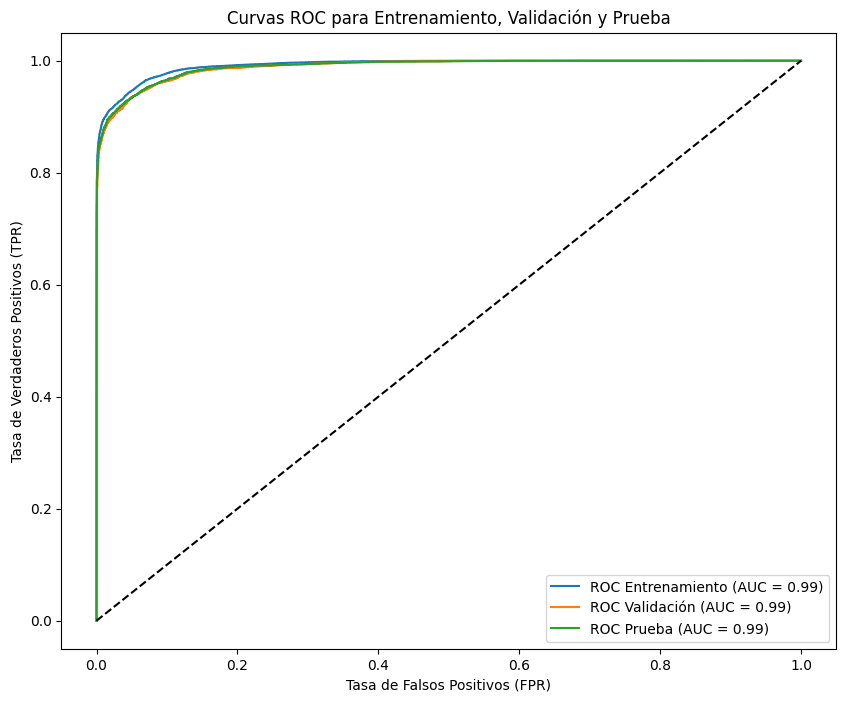

In [19]:

# Calcular los puntos de la curva ROC para cada conjunto de datos
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calcular el AUC para cada conjunto de datos
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

# Visualizar las curvas ROC
plt.figure(figsize=(10, 8))

# Curva ROC para Entrenamiento
plt.plot(fpr_train, tpr_train, label=f'ROC Entrenamiento (AUC = {roc_auc_train:.2f})')

# Curva ROC para Validación
plt.plot(fpr_val, tpr_val, label=f'ROC Validación (AUC = {roc_auc_val:.2f})')

# Curva ROC para Prueba
plt.plot(fpr_test, tpr_test, label=f'ROC Prueba (AUC = {roc_auc_test:.2f})')

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--')

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento, Validación y Prueba')
plt.legend(loc='lower right')

# Mostrar la gráfica
plt.show()


## Obtener la importancia de las variables

In [20]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)


print("\nImportancia de las variables:")
print(feature_importance_df)


Importancia de las variables:
                              feature  importance
11                    Online boarding    0.196571
6               Inflight wifi service    0.157430
4                               Class    0.133116
3                      Type of Travel    0.098026
13             Inflight entertainment    0.067157
12                       Seat comfort    0.044442
15                   Leg room service    0.040787
8              Ease of Online booking    0.040347
1                       Customer Type    0.034911
19                        Cleanliness    0.029350
14                   On-board service    0.028653
5                     Flight Distance    0.024175
18                   Inflight service    0.017685
17                    Checkin service    0.017192
2                                 Age    0.016941
16                   Baggage handling    0.016005
7   Departure/Arrival time convenient    0.010102
10                     Food and drink    0.009679
9                  

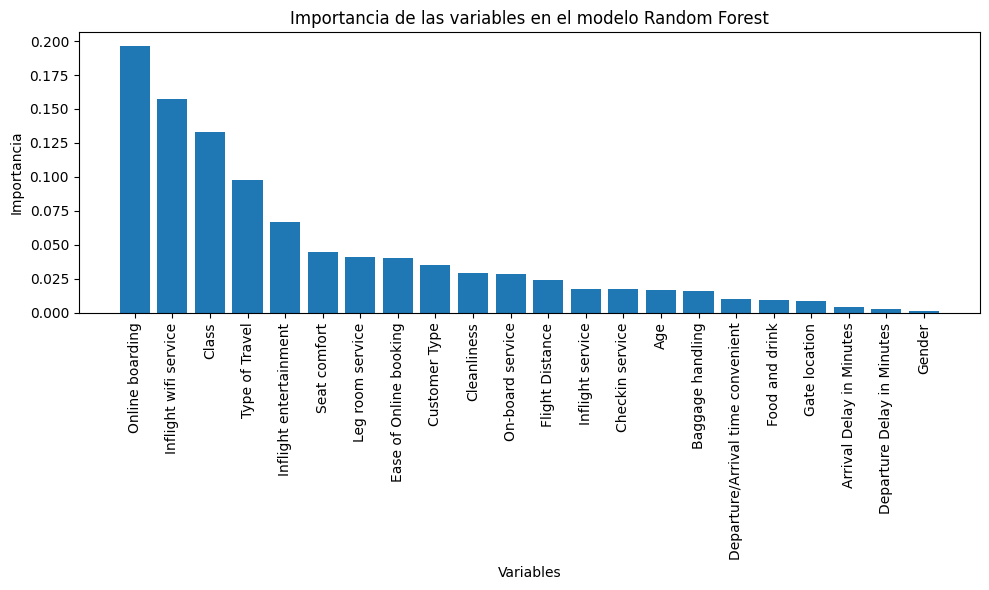

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo Random Forest')
plt.tight_layout()
plt.show()